load data from 'Data_2.csv'...
File loaded successfully!
Top 5 Talkers (Source IPs)
src_IP
13.107.4.50       5960
130.14.250.7      4034
155.69.160.38     3866
171.67.77.19      2656
155.69.199.255    2587
Name: count, dtype: int64

 Top 5 Listeners (Destination IPs)
dst_IP
137.132.228.33    5908
192.122.131.36    4662
202.51.247.133    4288
137.132.228.29    4022
103.37.198.100    3741
Name: count, dtype: int64

Top 5 Applications (by Destination Port)
dst_port
443      43208
80       11018
50930     2450
15000     2103
8160      1354
Name: count, dtype: int64

Transport Protocol Proportion
TCP packets (Protocol 6): 137707 (77.70%)
UDP packets (Protocol 17): 36852 (20.79%)

Total Estimated Traffic
Total IP_size in log file: 169934750 bytes
Sampling Rate: 1 in 2048
Estimated Total Traffic: 331903.81 MB

Additional Analysis: Top Communication Pairs
src_IP          dst_IP        
130.14.250.7    103.37.198.100    3739
171.67.77.19    192.122.131.36    2656
129.99.230.54   137.132.22.74  

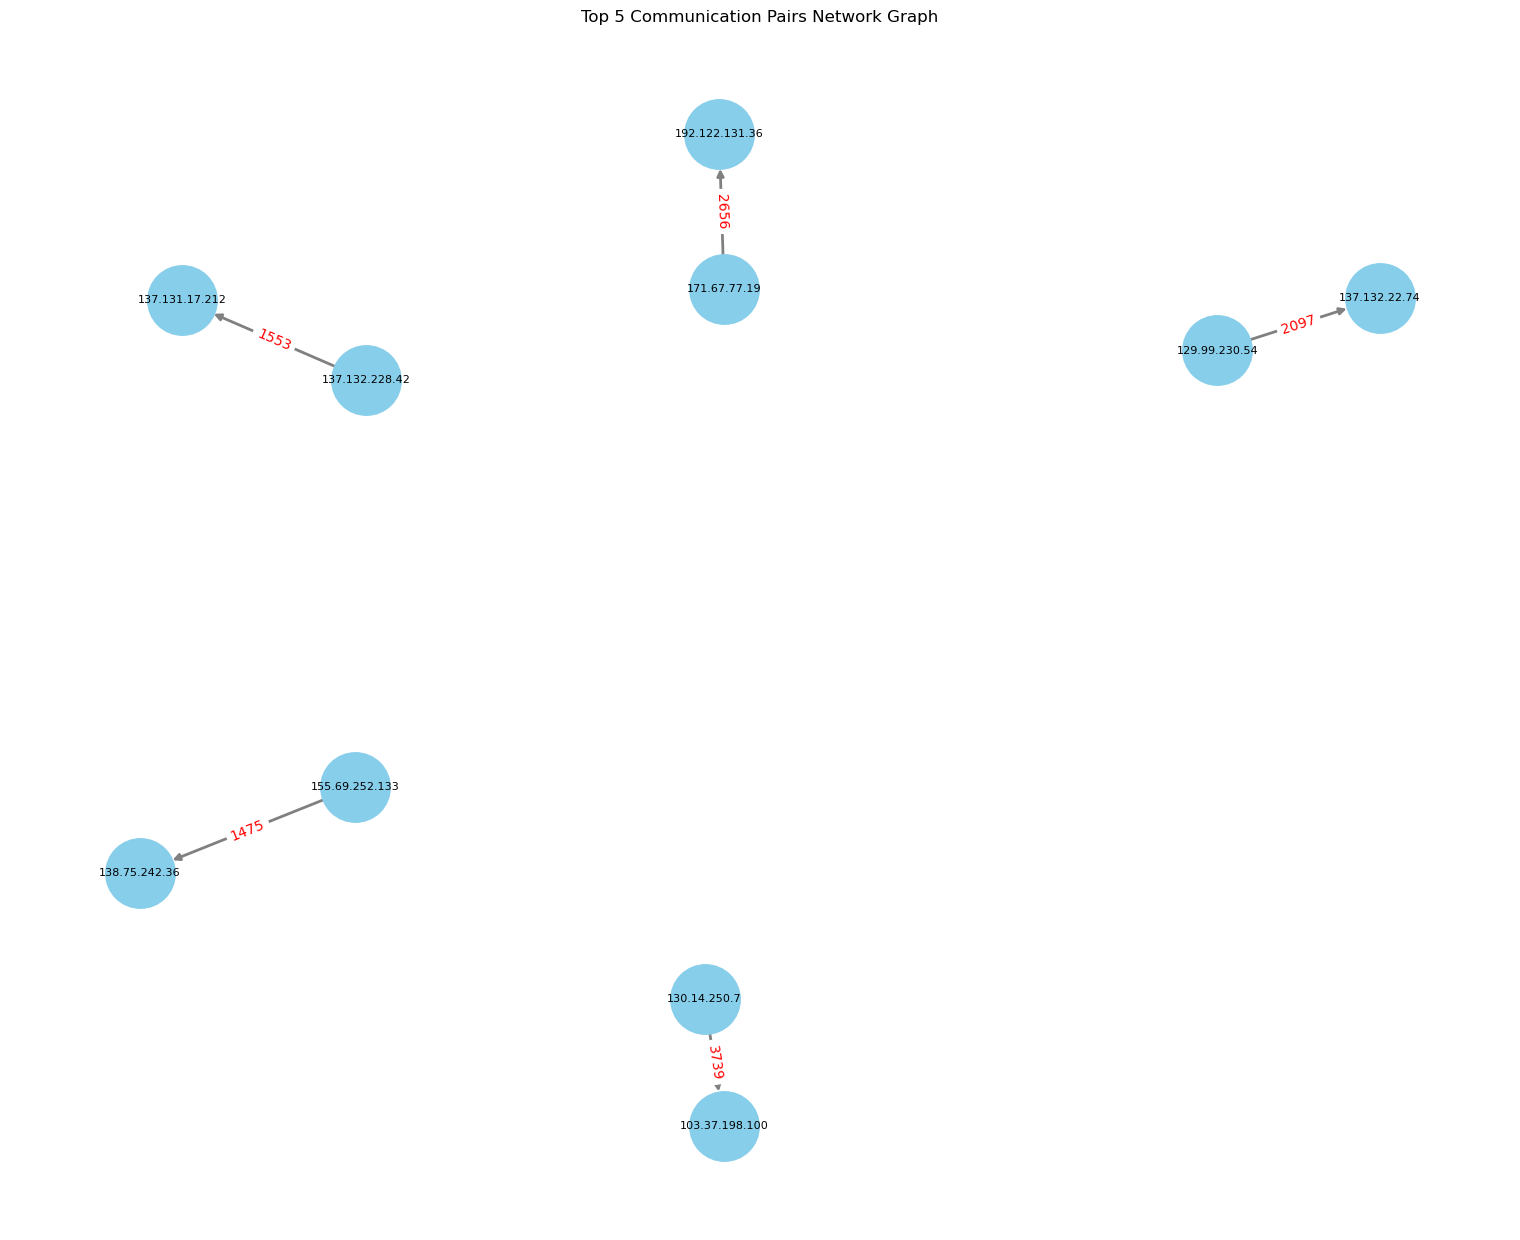

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

#load data
def load_traffic_data(file_path):
    print(f"load data from '{file_path}'...")
    try:
        column_names = [
            "Type", "sflow_agent_address", "inputPort", "outputPort", "src_MAC", "dst_MAC",
            "ethernet_type", "in_vlan", "out_vlan", "src_IP", "dst_IP", "IP_protocol",
            "ip_tos", "ip_ttl", "src_port", "dst_port", "tcp_flags",
            "packet_size", "IP_size", "sampling_rate"
        ]
        df = pd.read_csv(file_path, header=None, names=column_names)
        print("File loaded successfully!")
        return df
    except FileNotFoundError:
        print(f"\nError: '{file_path}' was not found.")
        print("make sure your Python script and the CSV file are in the same folder")
        return None

def analyse_core_metrics(df):

    #Top 5 Talkers
    top_talkers = df['src_IP'].value_counts().nlargest(5)
    print("Top 5 Talkers (Source IPs)")
    print(top_talkers)


    #Top 5 Listeners
    top_listeners = df['dst_IP'].value_counts().nlargest(5)
    print("\n Top 5 Listeners (Destination IPs)")
    print(top_listeners)

    #Top 5 Applications
    top_applications = df['dst_port'].value_counts().nlargest(5)
    print("\nTop 5 Applications (by Destination Port)")
    print(top_applications)


    #Proportion of TCP and UDP Packets
    tcp_count = df[df['IP_protocol'] == 6].shape[0]
    udp_count = df[df['IP_protocol'] == 17].shape[0]
    total_packets_in_log = len(df)
    tcp_percentage = (tcp_count / total_packets_in_log) * 100
    udp_percentage = (udp_count / total_packets_in_log) * 100

    print("\nTransport Protocol Proportion")
    print(f"TCP packets (Protocol 6): {tcp_count} ({tcp_percentage:.2f}%)")
    print(f"UDP packets (Protocol 17): {udp_count} ({udp_percentage:.2f}%)")

    #Total Estimated Traffic
    sampling_rate = df['sampling_rate'].iloc[0]
    total_ip_size_in_log = df['IP_size'].sum()
    estimated_total_traffic_bytes = total_ip_size_in_log * sampling_rate
    estimated_total_traffic_mb = estimated_total_traffic_bytes / (1024 * 1024)

    print("\nTotal Estimated Traffic")
    print(f"Total IP_size in log file: {total_ip_size_in_log} bytes")
    print(f"Sampling Rate: 1 in {sampling_rate}")
    print(f"Estimated Total Traffic: {estimated_total_traffic_mb:.2f} MB")

def analyse_and_visualise_pairs(df):
    print("\nAdditional Analysis: Top Communication Pairs")
    communication_pairs = df.groupby(['src_IP', 'dst_IP']).size().nlargest(5)
    print(communication_pairs)

    print("\nNetwork Visualisation Plot")
    try:
        G = nx.DiGraph()
        for (src, dst), count in communication_pairs.items():
            G.add_edge(src, dst, weight=count)

        plt.figure(figsize=(15, 12))
        pos = nx.spring_layout(G, k=1.5, iterations=50)
        nx.draw(G, pos, with_labels=True, node_size=2500, node_color='skyblue', font_size=8, width=2, edge_color='gray')
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

        plt.title("Top 5 Communication Pairs Network Graph")
        output_filename = "Network_Graph_Top5.png"
        plt.savefig(output_filename, dpi=300)
        print(f"Saved visualisation into '{output_filename}'")

    except ImportError:
        print("Please install matplotlib and 'networkx.")
        print("Run conda install matplotlib networkx")


def main():
    file_path = 'Data_2.csv'
    traffic_data = load_traffic_data(file_path)

    if traffic_data is not None:
        analyse_core_metrics(traffic_data)
        analyse_and_visualise_pairs(traffic_data)


if __name__ == "__main__":
    main()







